# The Weekend & Monday Effects 

## Introduction

### The Weekend Effect

The Weekend Effect suggests that stock returns are higher on days directly before the weekend than days directly after. For instance, the difference between the opening and closing price on a Friday results in gains that are bigger than gains found between the opening and closing prices on the following Monday. This theory will be tested and its extent measured to find potential anomalies in the market. Gains on other weekdays will also monitored to determine which day results in the best profits.

#### Key Questions

Do Fridays result in higher return than Mondays generally? How often are Friday's returns higher than Mondays? To what extent and by how much does the difference between returns vary? How do these results compare to other days? How do they vary over time?

### The Monday Effect

The Monday effect also replicates a weekend stock behaviour. This theory suggests that a stock on a day following the weekend will continue to trend in the direction that was set before the weekend. For instance, if a stock on Friday is trending upwards, the stock on Monday will also trend upwards.

#### Key Questions

Do trends continue past the weekend? Are Friday and Monday returns significantly correlated? How does this correlation compare to other days? How does this vary over time? Does the current trend influence the trend of the next period?

### Setup

Both the Weekend and Monday effect will be tested using data from the S&P 500, an index fund with a long history of data. A dataframe will be consolidated to calculate returns. Data will be selected, cut, and merged to compare days and their respective open and close prices. Weekend data is created to compare Friday's accompanying Monday data. Only then can trends be added.

### Analysis
Our analysis will first look to the validity of the Weekend and Monday Effects. Once they have been understood, key insights about how they could be used to find anomalies in the market will be discussed. A Risk-Reward analysis will also be completed to decide the best day to invest in the market

## Create DataFrame
Our set portfolio will look to the S&P 500. Import packages, read in csv files, and consolidate columns of open and closing prices.

### Import Packages

In [136]:
#Import relevant packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Read CSV Files

In [137]:
#Read CSV files, keep relevant columns, parse dates on date column
sp = pd.read_csv('data/SPX.csv', usecols =['Date','Close','Open'], parse_dates=['Date'])

### Drop Duplicates 

In [138]:
#Drop using query as open not equal to close
sp = sp.query('Open != Close')

### Drop Zero Values

In [139]:
#Drop zero values
sp = sp.query('Open != 0')

### Consolidate

To compare open and close price returns over the weekend, both columns need to be consolidated. The return can then be calculated. 

In [140]:
#apply melt to consolidate, save open and close variables as time and value name as price
sp = sp.melt(id_vars='Date', var_name='time', value_name='price')

#sort values by date and price so both are sequential
sp = sp.sort_values(['Date','time'], ascending=[True, False])

## Add Columns

Now that the price column is consolidatd, new columns can be made such as the return column. The Date column will also help to establish the day-time and week columns so that a cross comparison may be made between values.

### Return

The return will help to quantify differences in stock prices to:

    1. easily identify the trend of the stock price as rising or falling

    2. accurately calculate correlation over a long period of time
    
Return is found by applying the following formula:


$$ Return = \frac{price_{current} - price_{previous}} {price_{previous}}$$



Create a new column for $price_{previous}$ and apply the formula

In [141]:
#Rename current period price as price_c
sp = sp.rename(columns = {'price':'price_c'})

#save price_p as previous price_c with -1 shift
sp['price_p'] = sp['price_c'].shift(1)

#Calculate return
sp['return'] = ((sp['price_c'] - sp['price_p']) / sp['price_p']) * 100

#reset_index, drop column 'index'
sp = sp.reset_index().drop(columns='index')

In [142]:
#replace 0 values with NaN

sp['return'].replace(0, np.nan, inplace=True)

### Day and Time

Day of the week is found using the day name function. Concatenate day and time to allow for comparisons between Friday closing prices and Monday opening prices.

In [143]:
#Apply day_name and save apple['day'] as a category
sp['day'] = sp['Date'].dt.day_name().astype('category')

#Create day_time column with concatenation, save as category type
sp['day_time'] = (sp['day'].astype(str) + ' ' + sp['time']).astype('category')

### Week

Week will act as the index column when we re-organise and compare daily prices. 

In [144]:
#Add week column to identify each week
sp['week'] = sp['Date'].dt.strftime('%Y-%V')

#sort values
sp = sp.sort_values('Date')

#Reorder columns so week appears first
cols = sp.columns.tolist()
cols = cols[-1:] + cols[:-1]
sp = sp[cols]

## Select, Cut and Merge Data

Each return must be sorted by its corresponding day and time for an efficient analysis. An initial dataset will be created to measure the return between open and closing prices (Monday Effect). This dataframe will be reduced to measure the difference between the return within each day (Weekend Effect).

### Select Data

In [145]:
#save return, week, day-time columns, and year columns as df
df = sp[['week','day_time','return']]

### Merge

Merge each open and close price to their appropriate day. Merge days together

In [146]:
#slice dataframes for each day and time pair, drop all columns except return and date
mo = df[df['day_time'] == 'Monday Open'].drop(columns='day_time').rename(columns = {'return':'Monday'})
mc = df[df['day_time'] == 'Monday Close'].drop(columns='day_time').rename(columns = {'return':'Monday'})
to = df[df['day_time'] == 'Tuesday Open'].drop(columns='day_time').rename(columns = {'return':'Tuesday'})
tc = df[df['day_time'] == 'Tuesday Close'].drop(columns='day_time').rename(columns = {'return':'Tuesday'})
wo = df[df['day_time'] == 'Wednesday Open'].drop(columns='day_time').rename(columns = {'return':'Wednesday'})
wc = df[df['day_time'] == 'Wednesday Close'].drop(columns='day_time').rename(columns = {'return':'Wednesday'})
tho = df[df['day_time'] == 'Thursday Open'].drop(columns='day_time').rename(columns = {'return':'Thursday'})
thc = df[df['day_time'] == 'Thursday Close'].drop(columns='day_time').rename(columns = {'return':'Thursday'})
fo = df[df['day_time'] == 'Friday Open'].drop(columns='day_time').rename(columns = {'return':'Friday'})
fc = df[df['day_time'] == 'Friday Close'].drop(columns='day_time').rename(columns = {'return':'Friday'})

In [147]:
#Merge open and close data that occur on each day day of the week
m = mo.merge(mc, on='week', how = 'outer', suffixes=('_open','_close'))
t= to.merge(tc, on='week', how = 'outer', suffixes=('_open','_close'))
w= wo.merge(wc, on='week', how = 'outer',suffixes=('_open','_close'))
th= tho.merge(thc, on='week', how = 'outer', suffixes=('_open','_close'))
f= fo.merge(fc, on='week', how = 'outer',suffixes=('_open','_close'))

#merge each day together to create apple_dt, create new dataframe from weeks
df = m.merge(t, on ='week', how='outer').merge(w, on ='week', how='outer') \
        .merge(th, on ='week', how='outer').merge(f, on ='week', how='outer').sort_values('week')

### Add Weekend Data

In [148]:
#create two new columns for next Monday's open and close values using shift
df['Monday_open_next'] = df['Monday_open'].shift(-1)
df['Monday_close_next'] = df['Monday_close'].shift(-1)

#confirm next monday returns reflect accurately
print(df[['Monday_open','Monday_close','Monday_open_next','Monday_close_next']].head())

      Monday_open  Monday_close  Monday_open_next  Monday_close_next
1968          NaN           NaN          0.252868           0.269043
0        0.252868      0.269043         -0.412232           0.741636
1       -0.412232      0.741636         -0.326441          -0.587844
2       -0.326441     -0.587844         -0.330480          -0.773681
3       -0.330480     -0.773681         -0.374271           0.288312


### Add Year

Add year to track returns over specific periods

In [149]:
#save year as 
df[['year','x']] = df['week'].str.split('-', expand = True)
                            
#drop x column
df.drop(columns='x', inplace = True)
    
#Set index on week
df.set_index('week', inplace= True)

#change year dtype from date-time to integer to allow for loop
df['year'] = df['year'].astype(int)

### Add Trend

Add a trend column. Assign a positive, negative or nan trend to each data set.

In [150]:
#add empty columns for trends with loop, ignore year column
for column in df.iloc[:,0:12]:
    df[column + '_trend'] = np.nan

In [151]:
#use loop on all open and close columns, ignore year and other trend columns
for column in df.iloc[:,0:12]:

#create loop within to return positive, negative or nan values for given returns, save over _trend columns
    for i in range(len(df)):
    
        if df.iloc[i,df.columns.get_loc(column)] > 0:
            df.iloc[i, 13 + df.columns.get_loc(column)] = 'positive'
        
        elif df.iloc[i,df.columns.get_loc(column)] < 0:
            df.iloc[i, 13 + df.columns.get_loc(column)] = 'negative'
            
        else:
            df.iloc[i, 13 + df.columns.get_loc(column)] = np.nan

#print Monday and Friday data to confirm accurate application
print(df[['Monday_open','Monday_open_trend','Friday_close','Friday_close_trend']].head(5))

/var/folders/mc/2h3nzhln2bs9klxfl4_8hd8w0000gn/T/ipykernel_48765/2815138030.py:8: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'positive' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

/var/folders/mc/2h3nzhln2bs9klxfl4_8hd8w0000gn/T/ipykernel_48765/2815138030.py:11: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'negative' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



         Monday_open Monday_open_trend  Friday_close Friday_close_trend
week                                                                   
1982-16          NaN               NaN      0.525336           positive
1982-17     0.252868          positive      0.197920           positive
1982-18    -0.412232          negative      0.327510           positive
1982-19    -0.326441          negative     -0.160740           negative
1982-20    -0.330480          negative     -0.121707           negative


### Drop Open Prices

Open prices are no longer needed.

In [152]:
#drop columns containing '_open', save as df1
df1 = df.drop(columns = df.columns[df.columns.str.contains('_open')])

#delete '_close' portion of the string within column titles
df1.columns = df1.columns.str.replace('_close','')

#print head
print(df1.head())

           Monday   Tuesday  Wednesday  Thursday    Friday  Monday_next  year  \
week                                                                            
1982-16       NaN -0.310882   0.207826  1.270308  0.525336     0.269043  1982   
1982-17  0.269043 -0.898631  -0.483748 -0.223370  0.197920     0.741636  1982   
1982-18  0.741636  0.042582  -0.152737 -0.117825  0.327510    -0.587844  1982   
1982-19 -0.587844  0.742363  -0.600551 -0.722204 -0.160740    -0.773681  1982   
1982-20 -0.773681 -0.438334  -0.622785 -0.226384 -0.121707     0.288312  1982   

        Monday_trend Tuesday_trend Wednesday_trend Thursday_trend  \
week                                                                
1982-16          NaN      negative        positive       positive   
1982-17     positive      negative        negative       negative   
1982-18     positive      positive        negative       negative   
1982-19     negative      positive        negative       negative   
1982-20     negati

# Analysis

## Weekend Effect

Do Fridays result in higher return than Mondays generally? How often are Friday's returns higher than Mondays? By how much does the difference between returns vary? How do these results compare to other days? How do they vary over time?

### General Analysis

Do Friday returns result in a higher return than Mondays generally?

Summary statistics identify mean and median averages for a general analysis. 

In [153]:
print(df1.drop(columns=['year','Monday_next']).describe())

            Monday      Tuesday    Wednesday     Thursday       Friday
count  1968.000000  2138.000000  2142.000000  2100.000000  2090.000000
mean      0.012984     0.057363     0.053278     0.031076     0.023582
std       1.211731     1.074650     1.014792     1.063817     0.999862
min     -20.466931    -5.802761    -8.723100    -7.941968    -6.761155
25%      -0.397724    -0.468788    -0.417403    -0.427751    -0.441689
50%       0.057442     0.024934     0.071055     0.046373     0.068649
75%       0.534307     0.569160     0.534560     0.556492     0.524164
max       9.926045    10.789006     9.099355     6.817246     5.846476


From first observance, Monday's returns are both lower in terms of mean and median than Friday. This supports the weekend effect. Tuesday and Wednesday double the mean average than Friday. The highest median also occurs on Wednesday. This begs the question as to whether a weekday effect may also exist. Further analysis is needed.

### Frequency of Higher Returns

How often are Friday's returns higher than Mondays?

The previous analysis does not account for matched values, rather it compares all values against data that may be missing.
Concurrent days and their returns will be matched directly. This preserves as many datapoints as possible. Within new dataframes, the difference betweeen returns on concurrent days will be measured. The frequency of higher returns can then be calculated. From here, the relationship between Friday and Monday will be compared to other pairings.

In [154]:
#Select only return value columns from df1
for column in df1.iloc[:,0:5]:

    #save stc as slice of df1 for current and next columns, drop na values to match
    stc = df1[[column,df1.columns[df1.columns.get_loc(column) + 1]]].dropna()
    
    #Create new column to find difference between return values
    stc['diff'] = (stc[column] - stc[df1.columns[df1.columns.get_loc(column) + 1]])
    
    #Calculate percentage of higher prices (when diff is more than 0) on first day of pairs
    p = (((stc['diff'] > 0).sum()) / len(stc['diff']) * 100).round(1)

    #print column and next column with percentage of higher values from first column
    print('higher ' + column + ' than ' + df1.columns[df1.columns.get_loc(column) + 1] + ' = ',  p)

higher Monday than Tuesday =  52.5
higher Tuesday than Wednesday =  50.4
higher Wednesday than Thursday =  50.7
higher Thursday than Friday =  51.1
higher Friday than Monday_next =  53.3


If the day of the week did not influence the stock price, an expected frequency result would be split exactly at 50-50. Results from Tuesday - Thursday are close to this value. However, from this analysis, Fridays result in higher returns than Monday by a difference by 6.6% (3.3% either side). This supports the Weekend Effect. Interestingly, Monday's returns are higher than Tuesdays by 5%. 

### Average Return of Matched Pairs

By how much does the difference between returns vary?

The weekend effect isn't helpful if the extent of its difference in returns is minimal. This test will compare returns using a similar process as above.

In [155]:
#Create empty dataframe for matched averages data
matched_averages = pd.DataFrame(index=range(5),columns=range(8))

#create columns with current and next day names, median, mean and differences
matched_averages.columns = ['current day','next_day','c_mean','n_mean','mean_diff','c_median','n_median','median_diff']

#Select only return value columns from df1
for column in df1.iloc[:,0:5]:
    
    #save stc as slice of df1 for current and next columns
    stc = df1[[column,df1.columns[df1.columns.get_loc(column) + 1]]].dropna()
    
    #save means and medians of current and next periods as a,b,c,d
    a = round(stc[column].mean(),3)
    b = round(stc[column].median(),3)
    c = round(stc[df1.columns[df1.columns.get_loc(column) + 1]].mean(),3)
    d = round(stc[df1.columns[df1.columns.get_loc(column) + 1]].median(),3)
    
    #Save current and next day to matched_averages
    matched_averages.iloc[(df1.columns.get_loc(column)),0] = df1.columns[(df1.columns.get_loc(column))]
    matched_averages.iloc[(df1.columns.get_loc(column)),1] = df1.columns[(df1.columns.get_loc(column) + 1)]
    
    #Save appropriate means and medians to location
    matched_averages.iloc[(df1.columns.get_loc(column)),2] = a
    matched_averages.iloc[(df1.columns.get_loc(column)),3] = c
    matched_averages.iloc[(df1.columns.get_loc(column)),5] = b
    matched_averages.iloc[(df1.columns.get_loc(column)),6] = d
    
    #Save difference between current and next day means and medians
    matched_averages.iloc[(df1.columns.get_loc(column)),4] = a - c
    matched_averages.iloc[(df1.columns.get_loc(column)),7] = b - d
    
print(matched_averages.drop(columns = 'next_day'))

  current day c_mean n_mean mean_diff c_median n_median median_diff
0      Monday  0.014  0.064     -0.05    0.058    0.031       0.027
1     Tuesday  0.059  0.051     0.008    0.025     0.07      -0.045
2   Wednesday  0.049  0.031     0.018    0.068    0.046       0.022
3    Thursday  0.026  0.016      0.01    0.042    0.066      -0.024
4      Friday  0.019  0.018     0.001    0.068    0.065       0.003


When matched, Friday's returns are just barely bigger than Monday's in terms of both mean and median averages. Whilst the Weekend effect holds from the previous test, the extent at which returns differ is minimal at 0.3 basis points. Interestingly, Wednesday's returns beat Thursday's returns on both metrics, albeit with a lower frequency of higher returns. 

The biggest difference however is seen between Tuesday and Wednesday. The median price sees a return difference of negative 4.5 basis points. 

### Yearly Findings

Do these trends still hold up today?

The Weekend Effect will be measured on a year by year basis and compared visually. A new dataframe will be created to measure frequency and average returns.

In [156]:
#save recent data from chosen year onwards
rd = df1.query(' year >= 1980 ')

#create column names for current day, next day, higher current day
columns = ['current_day','next_day','higher_freq_day','median_return_current','median_return_next','median_diff','mean_diff']

#create row length equal to unique year values
rows = rd['year'].unique()

#create rows_5 equal to rows repeated 5 times for each day pairing
rows_5 = []

for i in range(len(rows)):
    rows_5.append(rows[i])
    rows_5.append(rows[i])
    rows_5.append(rows[i])
    rows_5.append(rows[i])
    rows_5.append(rows[i])

#Create new dataframe for frequency/averages saved as 
yearly_we = pd.DataFrame(index=rows_5, columns=columns)

In [157]:
#create loop for first five rows in rd
for column in rd.iloc[:,0:5]:
    
    #save row names for current day
    yearly_we.iloc[rd.columns.get_loc(column),0] = column

    for i in range(len(rd['year'].unique())):
        #yearly data
        yd = df1[df1['year'] == rd['year'].unique()[0] + i]

        #match values, drop na
        mv = yd[[column,yd.columns[yd.columns.get_loc(column) + 1]]].dropna()

        #Create new column to find difference between return values
        mv['diff'] = (mv[column] - (mv[yd.columns[rd.columns.get_loc(column) + 1]]))

        #calculate percentage of higher returns on first day of pairs (when diff is more than 0). 
        yearly_we.iloc[[rd.columns.get_loc(column) + i,rd.columns.get_loc(column) + (5*i)],2] = (((mv['diff'] > 0).sum()) / len(mv['diff'])).round(2)

        #calculate median return of current day
        yearly_we.iloc[[rd.columns.get_loc(column) + i,rd.columns.get_loc(column) + (5*i)],3] = mv[column].median()

        #calculate median return of next day
        yearly_we.iloc[[rd.columns.get_loc(column) + i,rd.columns.get_loc(column) + (5*i)],4] = mv[yd.columns[rd.columns.get_loc(column) + 1]].median()

        #calculate median difference between days
        yearly_we.iloc[[rd.columns.get_loc(column) + i,rd.columns.get_loc(column) + (5*i)],5] = mv[column].median() - mv[yd.columns[rd.columns.get_loc(column) + 1]].median()
        
        #calculate mean difference between days
        yearly_we.iloc[[rd.columns.get_loc(column) + i,rd.columns.get_loc(column) + (5*i)],6] = mv[column].mean() - mv[yd.columns[rd.columns.get_loc(column) + 1]].mean()
        

#create loop for current day values, for the length of rows_5 divided by 5 for each pasted row and negative one for the initial created iteration
for i in range((int(len(rows_5)/5))-1):
    
    yearly_we.iloc[5+(5*i): 5 + (5 * (i+1)), 0] = yearly_we.iloc[0:5, 0]
    
#shift values -1 from current day to find next day
yearly_we.iloc[:,1] = yearly_we.iloc[:,0].shift(-1)

print(yearly_we.head(5))

     current_day   next_day higher_freq_day median_return_current  \
1982      Monday    Tuesday            0.45              0.221447   
1982     Tuesday  Wednesday            0.46              -0.02974   
1982   Wednesday   Thursday            0.44             -0.188205   
1982    Thursday     Friday            0.51             -0.175439   
1982      Friday     Monday            0.52             -0.129613   

     median_return_next median_diff mean_diff  
1982           0.042582    0.178866  -0.13429  
1982          -0.152737    0.122997  0.076093  
1982          -0.168048   -0.020158  0.172961  
1982           -0.16074   -0.014698 -0.164897  
1982           0.082204   -0.211817  0.047484  


In [158]:
#create column for positive or negative returns compared to next period
yearly_we['freq'] = np.nan

for i in range(len(yearly_we)):
    if yearly_we.iloc[i,2] >= 0.50:
    
        yearly_we.iloc[i,7] = 'positive'

    else:

        yearly_we.iloc[i,7] = 'negative'

/var/folders/mc/2h3nzhln2bs9klxfl4_8hd8w0000gn/T/ipykernel_48765/3841326082.py:11: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'negative' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



In [159]:
#find count for positive and negative by grouping current day and frequency
freq_count = yearly_we.groupby(['current_day','freq']).count().iloc[:,0]
freq_count = pd.DataFrame(freq_count)
freq_count = freq_count.rename(columns = {'next_day':'count'})

freq_count['percent'] = np.nan

for i in range(len(freq_count)-1):
    freq_count.iloc[i+1,1] = (freq_count.iloc[i+1,0]) / (freq_count.iloc[i,0] + freq_count.iloc[i+1,0])
    
for i in range(len(freq_count)-5):
    freq_count.iloc[i+(i*1),1] = np.nan

#for i in range(len(freq_count)):
    #freq_count.iloc[i,

print(freq_count)

                      count   percent
current_day freq                     
Friday      negative     11       NaN
            positive     30  0.731707
Monday      negative     12       NaN
            positive     30  0.714286
Thursday    negative     15       NaN
            positive     27  0.642857
Tuesday     negative     15       NaN
            positive     27  0.642857
Wednesday   negative     22       NaN
            positive     20  0.476190


From this data, Friday's tend to offer a greater return than the next Monday's within 73% of captured years. Likewise, Monday compared to Tuesday also shows a similar trend. Wednesday shows the lowest comparative gains with an average of 47.6% of returns beating Thursday's. A time series plot will reveal more information for each day.

Select Friday values only and compare with next Monday values.

In [160]:
#create subset by selecting Friday values
ff = yearly_we[yearly_we['current_day'] == 'Friday']

#create year column from index for plot manipulation below

#reset index and save 'year' as index to avoid slicing error
ff = ff.reset_index()
ff['year'] = ff['index']

#set index to index column
ff = ff.set_index('index')

#rename columns 
ff = ff.rename(columns = {'median_diff':'return_diff','median_return_current':'friday_return', 'median_return_next':'monday_return'})

In [161]:
#create lineplot
fig = px.line(ff, x=ff.index, y = ['higher_freq_day','friday_return','monday_return','return_diff'])

# Highlight areas according to the frequency
current = ''
changes = []

for ind in ff.index:
    if current != ff['freq'][ind]:
        current = ff['freq'][ind]
        changes.append([ff['year'][ind],ff['freq'][ind]])

        
color_dict= {'positive':'#2ca02c', 'negative':'#d62728',}

for i, val in enumerate(changes):
    if (i+1) == len(changes):
            changes_last_date = changes[-1][0]
            changes_last_state = changes[-1][1]
            last_date= ff['year'].iloc[-1]
            fig.add_vrect(
                          x0=changes_last_date, x1=last_date,
                          fillcolor=color_dict[changes_last_state], opacity=0.2,
                          layer="below", line_width=0)

    else:
          
        if changes[i][1] =='positive':
            fig.add_vrect(
                       x0=changes[i][0], x1=changes[i+1][0],
                        fillcolor=color_dict['positive'], opacity=0.2,
                        layer="below", line_width=0)
            
        if changes[i][1] =='negative':
            fig.add_vrect(
                        x0=changes[i][0], x1=changes[i+1][0],
                        fillcolor=color_dict['negative'], opacity=0.2,
                        layer="below", line_width=0)

#update labels
fig.update_layout(xaxis_title="Year", yaxis_title="Values", 
                  title='Friday Returns compared with Next Monday')

#save figures for upload
fig.write_image("images/f-m.png")
fig.write_html("images/f-m.html")

#show figure
fig.show()

In [162]:
#create lineplot
fig = px.line(ff, x=ff.index, y = ['friday_return','monday_return'])

# Highlight areas according to the frequency
current = ''
changes = []

for ind in ff.index:
    if current != ff['freq'][ind]:
        current = ff['freq'][ind]
        changes.append([ff['year'][ind],ff['freq'][ind]])

        
color_dict= {'positive':'#2ca02c', 'negative':'#d62728',}

for i, val in enumerate(changes):
    if (i+1) == len(changes):
            changes_last_date = changes[-1][0]
            changes_last_state = changes[-1][1]
            last_date= ff['year'].iloc[-1]
            fig.add_vrect(
                          x0=changes_last_date, x1=last_date,
                          fillcolor=color_dict[changes_last_state], opacity=0.2,
                          layer="below", line_width=0)

    else:
          
        if changes[i][1] =='positive':
            fig.add_vrect(
                       x0=changes[i][0], x1=changes[i+1][0],
                        fillcolor=color_dict['positive'], opacity=0.2,
                        layer="below", line_width=0)
            
        if changes[i][1] =='negative':
            fig.add_vrect(
                        x0=changes[i][0], x1=changes[i+1][0],
                        fillcolor=color_dict['negative'], opacity=0.2,
                        layer="below", line_width=0)

#update labels
fig.update_layout(xaxis_title="Year", yaxis_title="Values", 
                  title='Friday Return compared with Next Monday',
                 legend_title_text='Day')

#save figures for upload
fig.write_image("images/f_m.png")

#show figure
fig.show()

Recent data shows the relevance and extent of the Weekend Effect. The blue line shows the frequency of higher Friday returns compared to Monday in percentage. The green shaded area shows when there are more Friday's with higher returns than the next Monday. The red shaded areas show the opposite.The red and green lines shows the median return for each day. The purple is the difference between Friday's median return with Monday's median return.

From our generalised data a few differences remain. Firstly, this plot would argue the Weekend effect is more prevalent than first thought. 73% of years show Friday's have better gains than Monday. The second difference is the extent of the Weekend effect. From summary statistics there was very little difference between the average days returns. However, signficant differences remain when looking from year to year. Taking 2010 onwards, years where there is a significant difference in the frequency of higher Friday's results in significant differences in return. In 2013, 72% of Fridays returns were higher than Mondays with a mean basis differential of 19. Likewise, when only 42% of Fridays were higher, the mean differential was negative 40 basis points. 

Why does this difference between generalised and yearly data occur? 

These yearly data points highlight a core phenomenon. Higher frequencies of high Friday returns offer a smaller gain compared to Monday returns in a year with a lower frequency of high Friday returns. However, these gains mitigate eachother. As more years have higher Friday returns than Monday, the returns are almost offset as seen in the above generalised data.

Why is the Weekend Effect not present every year?

One explanation may rely on the general economy. For instance, the market saw a significant drop in 2020 when the covid pandemic hit. Only 42% of Fridays had higher gains and Monday's median return is 40 basis points higher. This trend continues with the global financial crisis that occurs at the end of 2008. In the aftermath, 2009 sees a decreasing frequency and difference of 21 basis points. The same trend continues in the early 2000s. What's common among these crashes is that Monday managed to see significant positive returns.

How can we use this to our advantage?

During a crash in the market, Mondays are better to invest in. They offer a much greater gain than could be made when investing on Friday's during bull markets economic development. The Weekend Effect persists to an extent that significant gains can be made. However, timing the market is important.

How does this compare to other pairings?

In [163]:
fig = px.line(yearly_we, x=yearly_we.index, y = 'median_return_current', color='current_day')

fig.update_layout(xaxis_title='Year', yaxis_title='Return', title='Median Daily Returns')

fig.show()

Selecting other pairings offers insights, however, can't be fully explained. For instance, Tuesday data shows how much more negative volatility exists when compared to Monday. Wednesday data also experiences tremendous volatility between years that makes it difficult to argue it superiority. Before the 2000s returns between Wednesday and Thursday seem positively correlated, before completely flipping. Correlation will be considered in the Monday Effect.

## Monday Effect

Do trends continue past the weekend? Are Friday and Monday returns significantly correlated? How does this correlation compare to other days? How does this vary over time? Does the current trend influence the trend of the next period?

### Trend

Do trends continue past the weekend?Given Friday's prices rise, how often does Monday's price rise? Given Friday's falls, how often does Monday's fall? How does this compare to other days?

What would be expected is a perfect 50% between values if the weekend effect does not exist.

In [164]:
#Create loop using trend columns in trend
for column in df1.iloc[:,7:12]:
    
    #keep data where positive values of the given column 
    column_positive = (df1[df1[column] == 'positive'])

    #keep data of positive values of the next day within the previously saved dataframe
    column_positive_next = column_positive[column_positive.iloc[:,column_positive.columns.get_loc(column) + 1] == 'positive']
    
    #print text
    print('percentage of positive ' + df1.columns[(column_positive.columns.get_loc(column) + 1)] + ' values within positive ' + (column) + ' values =')

    #print percentage, calculated by length of the latter dataframe divided by the original
    print(round(((len(column_positive_next)/len(column_positive))*100),2))

percentage of positive Tuesday_trend values within positive Monday_trend values =
47.14
percentage of positive Wednesday_trend values within positive Tuesday_trend values =
54.51
percentage of positive Thursday_trend values within positive Wednesday_trend values =
50.09
percentage of positive Friday_trend values within positive Thursday_trend values =
53.48
percentage of positive Monday_next_trend values within positive Friday_trend values =
48.41


As Friday's experiences a positive return, only 48.4% of Monday returns are positive. Interestingly, Wednesday follows the positive trend set on Tuesday 54% of the time.

In [165]:
#Create loop using trend columns in trend
for column in df1.iloc[:,7:12]:
    
    #keep data where the given column is negative
    column_negative = (df1[df1[column] == 'negative'])

    #select data of negative values of the next day within the previously saved dataframe
    column_negative_next = column_negative[column_negative.iloc[:,column_negative.columns.get_loc(column) + 1] == 'negative']
    
    #print text
    print('percentage of negative ' + df1.columns[(column_positive.columns.get_loc(column) + 1)] + ' values within negative ' + (column) + ' values =')

    #print length of the latter dataframe by the 
    print(round(((len(column_negative_next)/len(column_negative))*100),2))

percentage of negative Tuesday_trend values within negative Monday_trend values =
42.92
percentage of negative Wednesday_trend values within negative Tuesday_trend values =
45.15
percentage of negative Thursday_trend values within negative Wednesday_trend values =
44.01
percentage of negative Friday_trend values within negative Thursday_trend values =
46.43
percentage of negative Monday_next_trend values within negative Friday_trend values =
42.05


A negative trend set on Friday more often than not doesn't follow on the next Monday by an 8% margin. The Monday Effect is refuted in both these general analysis.

### Extent

How much does the return on Monday fluctuate with positive and negative returns given on Friday?

In [166]:
#Create empty dataframe to add extent data to
p_extent = pd.DataFrame(index=range(5),columns=range(4))

#create column names
p_extent.columns = ['previous day','current day','mean','median']

#Create loop using trend columns in trend
for column in df1.iloc[:,7:12]:
    
    #keep data where positive values of the given column 
    column_negative = (df1[df1[column] == 'positive'])
    
    #save appropriate values to p_extent
    p_extent.iloc[(column_positive.columns.get_loc(column) - 7),0] = df1.columns[(column_positive.columns.get_loc(column) - 7)]
    p_extent.iloc[(column_positive.columns.get_loc(column) - 7),1] = df1.columns[(column_positive.columns.get_loc(column) - 6)]
    p_extent.iloc[(column_positive.columns.get_loc(column) - 7),2] = column_positive.iloc[:,(column_positive.columns.get_loc(column)) - 6].agg(np.mean)
    p_extent.iloc[(column_positive.columns.get_loc(column) - 7),3] = column_positive.iloc[:,(column_positive.columns.get_loc(column)) - 6].agg(np.median)

print('return when previous day had a positive trend:')

print('')

#print mean return, calculated by aggregating values in appropriate column
print(p_extent)

return when previous day had a positive trend:

  previous day  current day      mean    median
0       Monday      Tuesday  0.077822  0.018786
1      Tuesday    Wednesday  0.085956  0.089347
2    Wednesday     Thursday  0.074207  0.056963
3     Thursday       Friday  0.670847  0.469092
4       Friday  Monday_next  0.054649   0.05284


/var/folders/mc/2h3nzhln2bs9klxfl4_8hd8w0000gn/T/ipykernel_48765/1484706478.py:16: FutureWarning:

The provided callable <function mean at 0x10a0a84a0> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.

/var/folders/mc/2h3nzhln2bs9klxfl4_8hd8w0000gn/T/ipykernel_48765/1484706478.py:17: FutureWarning:

The provided callable <function median at 0x10a1d8220> is currently using Series.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.



The Monday median price following a positive Friday trend is positive. However, when compared to other days, this relationship sits relatively in the mix. What is more interesting is that Friday experiences a tremendous gain when Thursday sets a positive trend. When comparing any price to Friday, every other day has a smaller return. What also must be noted is the difference in Friday's higher mean and median prices. An eighteen percent jump down indicates greagter volatility within Friday's returns.

In [167]:
#Create empty dataframe to add extent data to
n_extent = pd.DataFrame(index=range(5),columns=range(4))

#create column names
n_extent.columns = ['previous day','day','mean return','median return']

#Create loop using trend columns in trend
for column in df1.iloc[:,7:12]:
    
    #keep data where positive values of the given column 
    column_negative = (df1[df1[column] == 'negative'])
    
   #save appropriate values to n_extent
    n_extent.iloc[(column_negative.columns.get_loc(column) - 7),0] = df1.columns[(column_negative.columns.get_loc(column) - 7)]
    n_extent.iloc[(column_negative.columns.get_loc(column) - 7),1] = df1.columns[(column_negative.columns.get_loc(column) - 6)]
    n_extent.iloc[(column_negative.columns.get_loc(column) - 7),2] = column_negative.iloc[:,(column_negative.columns.get_loc(column)) - 6].agg(np.mean)
    n_extent.iloc[(column_negative.columns.get_loc(column) - 7),3] = column_negative.iloc[:,(column_negative.columns.get_loc(column)) - 6].agg(np.median)
    
print('return when previous day had a negative trend:')

print(n_extent)

return when previous day had a negative trend:
  previous day          day mean return median return
0       Monday      Tuesday    0.177963      0.159266
1      Tuesday    Wednesday    0.054648      0.083426
2    Wednesday     Thursday    0.028022      0.086214
3     Thursday       Friday    0.000813      0.043539
4       Friday  Monday_next   -0.025068      0.080993


/var/folders/mc/2h3nzhln2bs9klxfl4_8hd8w0000gn/T/ipykernel_48765/2750710822.py:16: FutureWarning:

The provided callable <function mean at 0x10a0a84a0> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.

/var/folders/mc/2h3nzhln2bs9klxfl4_8hd8w0000gn/T/ipykernel_48765/2750710822.py:17: FutureWarning:

The provided callable <function median at 0x10a1d8220> is currently using Series.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.



Interestingly, only Friday and Monday follow the trend (either positive or negative) set by the previous day in terms of mean. What's interesting is that Monday suffers a much more significant loss. However, the median refutes the existence of the Monday effect. Given a negative Monday, the mean return on Tuesday is much more significant.

### General Correlation

Are Friday's close and Monday's open return values positively correlated? To what extent? How does this compare to other days?

Now that sufficient data is given, a general correlation between data points can give a better understanding of the relationship of returns between days.

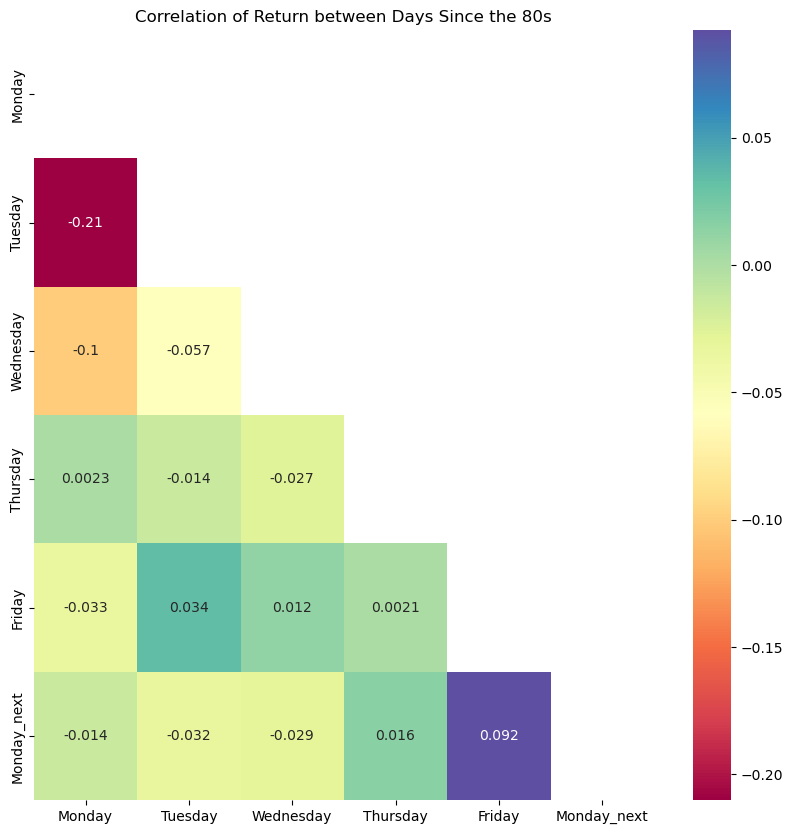

In [168]:
#Save me_corr as the correlation of days, drop unneccessary columns
me_corr = df1.drop(columns = df1[list(df1.columns[df1.columns.str.contains('_trend') | df1.columns.str.contains('year')])]).corr()

#Keep only relevant datapoints
me_corr = me_corr.mask(np.tril(np.ones(me_corr.shape)).astype(bool))

#transpose to read data easier
me_corr = me_corr.transpose()

#Increase size of plot
plt.subplots(figsize=(10,10))

#create heatmap of correlations
sns.heatmap(me_corr, annot=True, cmap='Spectral')

#add title
plt.title('Correlation of Return between Days Since the 80s')

#save plot for upload
plt.savefig('images/corr.png')

#show plot
plt.show()

From our findings, a positive correlation does exist. The correlation is minimal at only 9%. The strongest correlation appears to occur between Monday and Tuesday prices, yet is still insignificant.

### Correlation Across Time

Has the Monday effect ever been significant in recent years? Does the Monday effect change across time? Is there a stronger correlation between Monday and Tuesday? How about between other pairings?

In [169]:
#create list of columns for year and each day pairings
columns = ['mt','tw','wt','tf','fm']

#Create empty dataframe for each year of 
yearly_corr = pd.DataFrame(index=df1['year'].unique(),columns=columns)

#change year dtype from date-time to integer to allow for loop
df1['year'] = df1['year'].astype(int)

In [170]:
for i in range(len(df1['year'].unique())):
    a = df1[df1['year'] == (1982 + i)]
    
    a = a.drop(columns='year').drop(columns = a.columns[a.columns.str.contains('_trend')]).corr()
    
    #take only relevant correlation points
    yearly_corr.iloc[i,0] = a.iloc[1,0]
    yearly_corr.iloc[i,1] = a.iloc[2,1]
    yearly_corr.iloc[i,2] = a.iloc[3,2]
    yearly_corr.iloc[i,3] = a.iloc[4,3]
    yearly_corr.iloc[i,4] = a.iloc[5,4]

In [171]:
import plotly.express as px

fig = px.line(yearly_corr['fm'])
fig.update_layout(xaxis_title="Year", yaxis_title="Correlation", 
                  title='Fridays correlation with Next Monday since the 80s')
fig.write_image("images/f_m_corr.png")
fig.show()

The correlation between Friday and Monday returns may have been relevant once upon a time. In 1987, a 63 Percent correlation existed. However, only weaker correlations have existed since, of which many are negative. This directly refutes the Monday Effect.

Let's take a look at the highest correlated pairing between Monday and Tuesday.

In [172]:
fig = px.line(yearly_corr['mt'])
fig.update_layout(xaxis_title="Year", yaxis_title="Correlation", title='Mondays return correlation with Tuesday return')
fig.write_image("images/m_t_corr.png")

fig.show()

In [173]:
mt_2020 = df1[['Monday','Tuesday','year']]
mt_2020 = mt_2020[mt_2020['year'] == 2020]
#mt_2020 = mt_2020.iloc[8:20,:]
mt_2020.reset_index(inplace=True)
print(mt_2020[['Monday','Tuesday']].corr())

           Monday   Tuesday
Monday   1.000000 -0.665235
Tuesday -0.665235  1.000000


In [174]:
fig = px.scatter(mt_2020[['Monday','Tuesday']])
fig.update_layout(xaxis_title="Week", yaxis_title="Return", title='Monday and Tuesday Return each week of 2020')
fig.show()

In [175]:
fig = px.scatter(mt_2020, x ='Monday',y='Tuesday',trendline ='ols')
#fig.update_layout(xaxis_title="Week", yaxis_title="Return", title='2020 Monday return against Tuesday return')
fig.show()

Positive correlations appear weak, however, strong negative correlations have existed. 2020 boasts a linear negative correlation coefficient of -66%. Furthermore, 44% (r-squared value) of Tuesday returns can be explained by Monday's return.  Monday return prices in a year like 2020 could lead to significant insights into how the price on Tuesday would react.

The correlations of other pairings will be viewed below.

In [176]:
fig = px.line(yearly_corr[['tw','wt','tf']])
fig.update_layout(xaxis_title="Year", yaxis_title="Correlation", title='Correlations between Tue/Wed, Wed/Thu and Thu/Fri')
fig.show()

No other pairing has as strong correlations as Monday and Tuesday's do. Our earlier assertion of Wednesday and Thursday holding a positive correlation pre 2000 and a negative correlation post 2000 seem to be incorrect. Correlation switches almost every other year.

## Risk-Reward Analysis

Which day results in the greatest returns for the lowest risk? Does this change given the previous trend?

As the data is skewed, the median for each day on each year will be used as the return. Risk will be calculated using the standard deviation. However, this will be calculated to capture downward risk only. Return is then divided by risk to compare values (sortino value). Data is plotted and key data summarised.

### General Analysis

A new dataframe will be created to find the risk and return. Columns will represent risk, return, and return/risk. Return/risk will determined using the sortino method which only limits risk to that which is negative. 

In [177]:
#create three columns for each day with their median return, standard deviations and sortino ratios
columns = ['m_m','m_std','m_sr','t_m','t_std','t_sr','w_m','w_std','w_sr','th_m','th_std','th_sr','f_m','f_std','f_sr']

#save risk_return with rows as unique year values and above the above columns
risk_return = pd.DataFrame(index=df1['year'].unique(),columns=columns)

In [178]:
#create loop to capture all appropriate years
for i in range(len(df1['year'].unique())):
    a = df1[df1['year'] == (df1['year'].unique()[0] + i)]

        
    #create loop using trend columns
    for column in df1.iloc[:,7:12]:
    
        #keep negative values to find downside standard deviation
        b = (df1[df1[column] == 'negative'])
        
        #select the year equal to the first unique year value and increase by i 
        b = b[b['year'] == (df1['year'].unique()[0] + i)]
    
        #monday values
        risk_return.iloc[i,0] = a.iloc[:,0].median()
        risk_return.iloc[i,1] = b.iloc[:,0].std()
        risk_return.iloc[i,2] = a.iloc[:,0].median() / b.iloc[:,0].std()
        
        #tuesday values
        risk_return.iloc[i,3] = a.iloc[:,1].median()
        risk_return.iloc[i,4] = b.iloc[:,1].std()
        risk_return.iloc[i,5] = a.iloc[:,1].median() / b.iloc[:,1].std()
        
        #wednesday values
        risk_return.iloc[i,6] = a.iloc[:,2].median()
        risk_return.iloc[i,7] = b.iloc[:,2].std()
        risk_return.iloc[i,8] = a.iloc[:,2].median() / b.iloc[:,2].std()
        
        #thursday values
        risk_return.iloc[i,9] = a.iloc[:,3].median()
        risk_return.iloc[i,10] = b.iloc[:,3].std()
        risk_return.iloc[i,11] = a.iloc[:,3].median() / b.iloc[:,3].std()
        
        #friday values
        risk_return.iloc[i,12] = a.iloc[:,4].median()
        risk_return.iloc[i,13] = b.iloc[:,4].std()
        risk_return.iloc[i,14] = a.iloc[:,4].median() / b.iloc[:,4].std()

In [179]:
#create dataframes for risk, return and sortino ratios
risk = risk_return[['m_std','t_std','w_std','th_std','f_std']]
return_ = risk_return[['m_m','t_m','w_m','th_m','f_m']]
sortino = risk_return[['m_sr','t_sr','w_sr','th_sr','f_sr']]

In [180]:
#reset indexes
risk.reset_index(inplace=True)
return_.reset_index(inplace=True)
sortino.reset_index(inplace=True)

In [181]:
#melt return, risk and sortino dataframes
risk_melt = risk.melt(id_vars='index', var_name='day', value_name='risk')
return_melt = return_.melt(id_vars='index', var_name='day', value_name='return')
sortino_melt = sortino.melt(id_vars='index', var_name='day', value_name='sortino')

In [182]:
#create risk_return_melt dataframe
risk_return_melt = pd.DataFrame()

#save appropriate columns from previous melts
risk_return_melt['year'] = risk_melt['index']
risk_return_melt['day'] = risk_melt['day'].str.replace('_std','')
risk_return_melt['risk'] = risk_melt['risk']
risk_return_melt['return'] = return_melt['return']
risk_return_melt['sortino'] = sortino_melt['sortino']

In [183]:
#print scatter plot of all dates
fig = px.scatter(risk_return_melt, x = 'risk', y='return', color='day',
                 hover_data=['risk', 'return', 'sortino','day','year'],
                 title = 'Risk-Reward Values for each day from 1982 - 2023')
#save image
fig.write_image("images/risk-reward-general.png")

#save image
fig.show()

In [184]:
#print summary statistics for return
print(return_.drop(columns='index').agg(['median','std']))

             m_m       t_m       w_m      th_m       f_m
median  0.039007  0.019772  0.074439  0.044449  0.068214
std     0.150000  0.187067  0.177246  0.167528  0.133823


The above plot pits return against reward. Values that are further to the left have less risk and values that are higher have a greater return. The highest median average occurred in 2002 on a Wednesday with an average return of 55 basis points. Wednesday also has the highest median returns in terms of median average at 7.4 basis points. Friday follows closely behind, followed by Thursday, Monday and eventually Tuesday with only a median average of 1.4 basis points.

In [185]:
#print summary statistics for risk
print(risk.drop(columns='index').agg(['median','std']))

           m_std     t_std     w_std    th_std     f_std
median  0.777992  0.868282  0.759608  0.841000  0.655990
std     0.787968  0.414453  0.461449  0.441111  0.312934


The least risky point is held by Friday in 2017 with a downward standard deviation of .14. Friday also carries the lowest average median risk followed by Wednesday, Monday, Thursday and Tuesday. With low returns and high risk, Tuesday automatically takes last place as the worst day to invest on.

In [186]:
#print summary statistics for sortino ratio
print(sortino.drop(columns='index').agg(['median','std']))

            m_sr      t_sr      w_sr     th_sr      f_sr
median  0.046514  0.022424  0.095815  0.052197  0.110756
std     0.164079  0.189413  0.183532  0.167986  0.257638


The highest return point on Wednesday and lowest risk point held by Friday have a similar Sortino ratio. This means they offer a similar proportionate amount of risk for a proportionate return. Fridays generally take the win with a higher mean and median sortino ratio across the decades. Wednesday trails next before Thursday and finally Monday.

### Positive Trends

In [187]:
#create three columns for each day with their median return, standard deviations and sortino ratios
columns = ['m_m','t_m','w_m','th_m','f_m','m_std','t_std','w_std','th_std','f_std','m_sr','t_sr','w_sr','th_sr','f_sr']

#save risk_return
positive_risk_return = pd.DataFrame(index=df1['year'].unique(),columns=columns)

#change year dtype from date-time to integer to allow for loop
df1['year'] = df1['year'].astype(int)

In [188]:
#Create loop using trend columns in trend
for column in df1.iloc[:,7:12]:
    
    #keep data where positive values of the given column 
    column_positive = (df1[df1[column] == 'positive'])
    
    #Isolate columns to avoid nan values, reset index to allow for merge
    a = pd.DataFrame(column_positive[column_positive.columns[(column_positive.columns.get_loc(column) - 6)]]).reset_index()
    b = pd.DataFrame(column_positive[column_positive.columns[(column_positive.columns.get_loc(column) - 7)]]).reset_index()
    c = pd.DataFrame(column_positive[column_positive.columns[(column_positive.columns.get_loc(column) + 1 )]]).reset_index()
    d = a.merge(b, how = 'inner').merge(c, how = 'inner').dropna()
    
    #extract year from week column
    d[['year','x']] = d['week'].str.split('-', expand = True)
    
    #change year dtype from date-time to integer to allow for loop
    d['year'] = d['year'].astype(int)
                            
    #drop x column
    d.drop(columns='x', inplace = True)
    
    for i in range(len(d['year'].unique())):
    
        e = d[d['year'] == (d['year'].unique()[0] + i)]
        
        ##find downside standard deviation by selecting negative returns of next day
        f = e[e.iloc[:,3] == 'negative']
        
        positive_risk_return.iloc[i ,(column_positive.columns.get_loc(column) - 7)] = e.iloc[:,1].median()
        positive_risk_return.iloc[i,(column_positive.columns.get_loc(column)-2)] = f.iloc[:,1].std()
        positive_risk_return.iloc[i,(column_positive.columns.get_loc(column) + 3)] = e.iloc[:,1].median() / f.iloc[:,1].std()

In [189]:
#create dataframes for risk, return and sortino ratios
risk = positive_risk_return[['m_std','t_std','w_std','th_std','f_std']]
return_ = positive_risk_return[['m_m','t_m','w_m','th_m','f_m']]
sortino = positive_risk_return[['m_sr','t_sr','w_sr','th_sr','f_sr']]

In [190]:
#reset indexes
risk.reset_index(inplace=True)
return_.reset_index(inplace=True)
sortino.reset_index(inplace=True)

In [191]:
#melt return, risk and sortino dataframes
risk_melt = risk.melt(id_vars='index', var_name='day', value_name='risk')
return_melt = return_.melt(id_vars='index', var_name='day', value_name='return')
sortino_melt = sortino.melt(id_vars='index', var_name='day', value_name='sortino')

In [192]:
#create risk_return_melt dataframe
positive_risk_return_melt = pd.DataFrame()

#save appropriate columns from previous melts
positive_risk_return_melt['year'] = risk_melt['index']
positive_risk_return_melt['day'] = risk_melt['day'].str.replace('_std','')
positive_risk_return_melt['risk'] = risk_melt['risk']
positive_risk_return_melt['return'] = return_melt['return']
positive_risk_return_melt['sortino'] = sortino_melt['sortino']

In [193]:
#plot positive risk-return data
fig = px.scatter(positive_risk_return_melt, x = 'risk', y='return', 
                 color='day', hover_data=['risk', 'return', 'sortino','day','year'],
                 title = 'Risk-Reward Values from 1982 - 2023 given a Positive Trend')
fig.show()

In [194]:
print(return_.drop(columns='index').agg(['median','std']))

             m_m       t_m       w_m      th_m       f_m
median -0.005081  0.059240 -0.011174  0.096163  0.023142
std     0.197385  0.183127  0.196887  0.171780  0.203163


When positive trends have been set by the day before, Friday boasts the highest return of 58 basis points set back in 1990. However, Thursday takes the win with the highest mean and median averages. This is followed by Tuesday, Friday, Monday and finally Wednesday.

In [195]:
print(risk.drop(columns='index').agg(['median','std']))

           m_std     t_std     w_std    th_std     f_std
median  0.459781  0.510709  0.471992  0.628334  0.430611
std     0.241595  0.328360  0.315809  0.332458  0.448025


The least risky data point also goes to Friday which also takes the median average. Monday, Wednesday, Tuesday and Thursday follow.

In [196]:
print(sortino.drop(columns='index').agg(['median','std']))

            m_sr      t_sr      w_sr     th_sr      f_sr
median -0.010953  0.126332 -0.022332  0.145560  0.038113
std     0.422711  0.364609  0.556940  0.289303  0.446387


The difference between risk values isn't enough for Friday to win this category. When a positive trend exists, Thursday produces the best return at a lower risk than any other day. Tuesday, Friday, Monday and finally Wednesday follow. The last two on average produce negative returns after a positive trend has been set.

### Negative Trends

In [197]:
#create three columns for each day with their median return, standard deviations and sortino ratios
columns = ['m_m','t_m','w_m','th_m','f_m','m_std','t_std','w_std','th_std','f_std','m_sr','t_sr','w_sr','th_sr','f_sr']

#save risk_return
negative_risk_return = pd.DataFrame(index=df1['year'].unique(),columns=columns)

#change year dtype from date-time to integer to allow for loop
df1['year'] = df1['year'].astype(int)

In [198]:
#Create loop using trend columns in trend
for column in df1.iloc[:,7:12]:
    
    #keep data where positive values of the given column 
    column_negative = (df1[df1[column] == 'negative'])
    
    #Isolate columns to avoid nan values, reset index to allow for merge
    a = pd.DataFrame(column_negative[column_negative.columns[(column_negative.columns.get_loc(column) - 6)]]).reset_index()
    b = pd.DataFrame(column_negative[column_negative.columns[(column_negative.columns.get_loc(column) - 7)]]).reset_index()
    c = pd.DataFrame(column_negative[column_negative.columns[(column_negative.columns.get_loc(column) + 1 )]]).reset_index()
    d = a.merge(b, how = 'inner').merge(c, how = 'inner').dropna()
    
    #extract year from week column
    d[['year','x']] = d['week'].str.split('-', expand = True)
    
    #change year dtype from date-time to integer to allow for loop
    d['year'] = d['year'].astype(int)
                            
    #drop x column
    d.drop(columns='x', inplace = True)
    
    for i in range(len(d['year'].unique())):
    
        e = d[d['year'] == (d['year'].unique()[0] + i)]
        
        #find downside standard deviation by selecting negative returns of next day
        f = e[e.iloc[:,3] == 'negative']
        
        negative_risk_return.iloc[i ,(column_positive.columns.get_loc(column) - 7)] = e.iloc[:,1].median()
        negative_risk_return.iloc[i,(column_positive.columns.get_loc(column)-2)] = f.iloc[:,1].std()
        negative_risk_return.iloc[i,(column_positive.columns.get_loc(column) + 3)] = e.iloc[:,1].median() / f.iloc[:,1].std()

In [199]:
#create dataframes for risk, return and sortino ratios
risk = negative_risk_return[['m_std','t_std','w_std','th_std','f_std']]
return_ = negative_risk_return[['m_m','t_m','w_m','th_m','f_m']]
sortino = negative_risk_return[['m_sr','t_sr','w_sr','th_sr','f_sr']]

In [200]:
print(sortino.agg(['min', 'max','mean','median','std']))

            m_sr      t_sr      w_sr     th_sr      f_sr
min    -1.274552 -1.538168 -0.764499 -4.804148 -1.247182
max     1.783139  1.184577  1.230215  1.641775  3.693863
mean    0.379443  0.141150  0.118646 -0.044917  0.177075
median  0.271928  0.153505  0.129058  0.038758  0.079288
std     0.633565  0.514120  0.386864  0.918709  0.703409


In [201]:
#reset indexes
risk.reset_index(inplace=True)
return_.reset_index(inplace=True)
sortino.reset_index(inplace=True)

In [202]:
#melt return, risk and sortino dataframes
risk_melt = risk.melt(id_vars='index', var_name='day', value_name='risk')
return_melt = return_.melt(id_vars='index', var_name='day', value_name='return')
sortino_melt = sortino.melt(id_vars='index', var_name='day', value_name='sortino')

In [203]:
#create risk_return_melt dataframe
negative_risk_return_melt = pd.DataFrame()

#save appropriate columns from previous melts
negative_risk_return_melt['year'] = risk_melt['index']
negative_risk_return_melt['day'] = risk_melt['day'].str.replace('_std','')
negative_risk_return_melt['risk'] = risk_melt['risk']
negative_risk_return_melt['return'] = return_melt['return']
negative_risk_return_melt['sortino'] = sortino_melt['sortino']

In [204]:
fig = px.scatter(negative_risk_return_melt, x = 'risk', y='return', 
                 color='day', hover_data=['risk', 'return', 'sortino','day','year'],
                title = 'Risk-Reward Values from 1982 - 2023 given a Negative Trend')
fig.write_image('images/risk_return_negative.png')
fig.show()

In [205]:
print(return_.drop(columns='index').agg(['median','std']))

             m_m       t_m       w_m      th_m       f_m
median  0.165767  0.097329  0.066575  0.008441  0.053862
std     0.458089  0.247892  0.265944  0.405337  0.247860


Following a negative trend, Monday's offer the greatest return. This beats Tuesday by 6 basis points.

In [206]:
print(risk.drop(columns='index').agg(['median','std']))

           m_std     t_std     w_std    th_std     f_std
median  0.546464  0.505636  0.573540  0.566187  0.645292
std     0.363908  0.373040  0.425253  0.366228  0.877651


Risk remains relatively close with Tuesday beating out Monday, Thursday, Wednesday and finally Friday.

In [207]:
print(sortino.drop(columns='index').agg(['median','std']))

            m_sr      t_sr      w_sr     th_sr      f_sr
median  0.271928  0.153505  0.129058  0.038758  0.079288
std     0.633565  0.514120  0.386864  0.918709  0.703409


Investing on Monday given a negative trend offers the greatest return for the smallest risk by a large margin when compared to any other day or trend. Tuesday follows with Wednesday, Friday and finally Thursday. 

## Conclusion

### The Weekend Effect

#### General Analysis

The Weekend Effect is generally supported. Friday’s have higher returns than Mondays. Friday also beats every other day with the highest frequency of higher returns when compared to the proceeding day. However, the average return between Friday and Monday is almost negligible when matched.

#### Yearly Analysis
This changes when comparing data across years. Not only is the weekend effect supported (73% of years with higher returns than Monday) but returns show a significant difference. 72% of Friday returns were higher than Mondays in 2013, leading to a return difference of positive 19 basis points. This compares to negative 40 basis in 2020 when only 42% of Fridays were higher than Mondays.

#### Key Takeaways
This example highlights a core phenomenon. Higher frequencies of high Friday returns result in a positive gain. However, investing on Monday in a year with a lower frequency of high Friday returns offers a greater gain. Years where Friday returns are less frequent than Monday returns could be correlated to economic turmoil as seen in 2020, 2008 and the early 2000s. Investing on Monday’s during these years would see significant gains. Timing the market is important to the Weekend Effect.

### The Monday Effect

#### General Analysis

The general analysis suggests that the Monday Effect does not exist. Given a positive trend on Friday, only 48.4% of Monday returns were positive. Likewise, only 42% of Monday returns were negative following a negative trend from Friday. Yet, mean return values did match the trend, a trait that is only unique to the Friday and Monday pairing. A positive correlation between return prices supports the Monday Effect, albeit weakly.

#### Yearly Analysis

Tracking correlation over time would suggest that the Monday Effect may have been more relevant in the 80s. The last few decades provide for weak and varying relationships. 

#### Key Takeaways
Instead, the data supports a stronger relationship between Monday and Tuesday. Tuesday returns that follow a negative Monday average a positive 16 basis points with a general correlation of -.21. Tracking this over the years, 2020 showed a linear negative correlation of 66%. Monday return prices in a year like 2020 could lead to significant insights into how the price on Tuesday would react. More analysis into why this happened is required. 


### Risk-Reward Analysis

When no trend has been established, Friday’s offer the best reward for the risk it gives. This is closely followed by Wednesday which is slightly riskier but offers a little more reward. When a positive trend has already been established, Thursdays and Tuesdays offer the most reward by a significant margin. 

However, the greatest reward comes whilst investing on a Monday when the previous Friday set a negative trend. This level of reward for risk is double any other combination of trend or day. This is followed by investing on a Tuesday after a Monday positive trend has been set.